<a href="https://colab.research.google.com/github/wooookim/ML-DL/blob/main/%EC%84%9C%EC%9A%B8%EC%8B%9C_%ED%8F%89%EA%B7%A0_%EA%B8%B0%EC%98%A8_%EC%98%88%EC%B8%A1_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

data = pd.read_csv('/content/train.csv')
submission = pd.read_csv('/content/sample_submission.csv')

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
print(data.head())

           일시  최고기온  최저기온   일교차  강수량  평균습도  평균풍속  일조합  일사합  일조율  평균기온
0  1960-01-01   2.2  -5.2   7.4  NaN  68.3   1.7  6.7  NaN  NaN  -1.6
1  1960-01-02   1.2  -5.6   6.8  0.4  87.7   1.3  0.0  NaN  NaN  -1.9
2  1960-01-03   8.7  -2.1  10.8  0.0  81.3   3.0  0.0  NaN  NaN   4.0
3  1960-01-04  10.8   1.2   9.6  0.0  79.7   4.4  2.6  NaN  NaN   7.5
4  1960-01-05   1.3  -8.2   9.5  NaN  44.0   5.1  8.2  NaN  NaN  -4.6


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23011 entries, 0 to 23010
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      23011 non-null  object 
 1   최고기온    23008 non-null  float64
 2   최저기온    23008 non-null  float64
 3   일교차     23007 non-null  float64
 4   강수량     9150 non-null   float64
 5   평균습도    23011 non-null  float64
 6   평균풍속    23007 non-null  float64
 7   일조합     22893 non-null  float64
 8   일사합     18149 non-null  float64
 9   일조율     22645 non-null  float64
 10  평균기온    23011 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.9+ MB
None


In [5]:
# '일시' 열을 날짜 데이터로 변환
data['일시'] = pd.to_datetime(data['일시'])

# '일시' 컬럼에서 '월', '일' 열 추가
data['월'] = data['일시'].dt.month
data['일'] = data['일시'].dt.day

# 월, 일별 중앙값 계산
# 월별 중앙값 계산
monthly_means = data.groupby('월').median()
daily_means = data.groupby('일').median()

print(monthly_means)
print(daily_means)

    최고기온   최저기온    일교차   강수량   평균습도  평균풍속  일조합     일사합    일조율  평균기온     일
월                                                                        
1    1.7  -6.40   7.70  0.30  60.50   2.2  6.4   7.890  64.35  -2.6  16.0
2    4.4  -3.90   8.30  0.40  58.30   2.4  7.2  10.910  66.10   0.1  15.0
3   10.4   1.30   9.20  0.70  58.50   2.6  7.6  14.130  63.40   5.6  16.0
4   17.7   7.50  10.35  2.00  56.50   2.7  8.3  17.500  62.80  12.2  15.5
5   23.5  13.00  10.60  1.60  61.30   2.4  8.7  19.605  61.55  17.9  16.0
6   27.4  18.20   9.30  1.70  69.50   2.2  6.8  17.580  45.90  22.3  15.5
7   29.0  22.10   6.90  4.45  79.50   2.1  3.1  12.710  20.05  25.0  16.0
8   30.0  22.75   7.40  5.00  76.80   2.0  4.8  13.200  34.70  25.8  16.0
9   26.1  17.40   9.10  2.80  69.50   1.8  6.9  13.770  55.60  21.2  15.5
10  20.4  10.40  10.10  1.50  64.80   1.8  7.7  11.610  68.50  15.1  16.0
11  12.1   3.40   8.50  1.30  63.85   2.0  6.0   7.945  59.00   7.6  15.5
12   4.1  -3.80   7.60  0.30  62.00   

<ipython-input-5-d3c946c955f5>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_means = data.groupby('월').median()
<ipython-input-5-d3c946c955f5>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_means = data.groupby('일').median()


변경한 컬럼에 이상이 있었는데 어제 자려고 누웠다가 생각났다

In [6]:
from datetime import datetime

current_year = datetime.now().year

# 2월 29일에 해당하는 행 선택
selected_rows = data[(data['일시'].dt.month == 2) & (data['일시'].dt.day == 29)]

# 29일에 해당하는 16개 행
# 23011 - 16 = 22995

# 선택한 행의 인덱스를 사용하여 삭제
data = data.drop(selected_rows.index)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22995 entries, 0 to 23010
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일시      22995 non-null  datetime64[ns]
 1   최고기온    22992 non-null  float64       
 2   최저기온    22992 non-null  float64       
 3   일교차     22991 non-null  float64       
 4   강수량     9142 non-null   float64       
 5   평균습도    22995 non-null  float64       
 6   평균풍속    22991 non-null  float64       
 7   일조합     22877 non-null  float64       
 8   일사합     18137 non-null  float64       
 9   일조율     22630 non-null  float64       
 10  평균기온    22995 non-null  float64       
 11  월       22995 non-null  int64         
 12  일       22995 non-null  int64         
dtypes: datetime64[ns](1), float64(10), int64(2)
memory usage: 2.5 MB
None


In [7]:
# 결측값 대체
data.fillna(monthly_means, inplace=True)

for column in data.columns:
    if data[column].isnull().any():  # 결측값이 있는 경우에만 처리
        data[column+'_중앙값'] = data.apply(lambda row: monthly_means.loc[row['월'], column], axis=1)
        data[column].fillna(data[column+'_중앙값'], inplace=True)
        data.drop(column+'_중앙값', axis=1, inplace=True)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22995 entries, 0 to 23010
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일시      22995 non-null  datetime64[ns]
 1   최고기온    22995 non-null  float64       
 2   최저기온    22995 non-null  float64       
 3   일교차     22995 non-null  float64       
 4   강수량     22995 non-null  float64       
 5   평균습도    22995 non-null  float64       
 6   평균풍속    22995 non-null  float64       
 7   일조합     22995 non-null  float64       
 8   일사합     22995 non-null  float64       
 9   일조율     22995 non-null  float64       
 10  평균기온    22995 non-null  float64       
 11  월       22995 non-null  int64         
 12  일       22995 non-null  int64         
dtypes: datetime64[ns](1), float64(10), int64(2)
memory usage: 3.0 MB
None


In [8]:
train = data[['최고기온', '최저기온', '일교차', '강수량', '평균습도', '평균풍속', '일조합', '일사합', '일조율']]

target = data['평균기온']

In [9]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(train, target)

pred_xgb = xgb.predict(train)

from sklearn.metrics import mean_squared_error
xgb_mae = mean_squared_error(target, pred_xgb)
print(xgb_mae)

submission['평균기온'] = pred_xgb[:358]
print(submission.head(10))

0.14166466608301134
           일시      평균기온
0  2023-01-01 -1.947819
1  2023-01-02 -1.954418
2  2023-01-03  3.701954
3  2023-01-04  6.500602
4  2023-01-05 -4.035748
5  2023-01-06 -5.527994
6  2023-01-07  1.187517
7  2023-01-08  1.993192
8  2023-01-09  2.340629
9  2023-01-10  2.008724


In [10]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(train, target)

pred_rf = rf.predict(train)

from sklearn.metrics import mean_squared_error
rf_mae = mean_squared_error(target, pred_rf)
print(rf_mae)

submission['평균기온'] = pred_rf[:358]
print(submission.head(10))

0.03646600904544464
           일시   평균기온
0  2023-01-01 -1.647
1  2023-01-02 -2.111
2  2023-01-03  3.648
3  2023-01-04  7.113
4  2023-01-05 -4.219
5  2023-01-06 -5.284
6  2023-01-07  1.225
7  2023-01-08  1.837
8  2023-01-09  2.265
9  2023-01-10  2.036


좀 더 나아졌다

In [11]:
data['연도'] = data['일시'].dt.year

import warnings
warnings.filterwarnings(action='ignore')

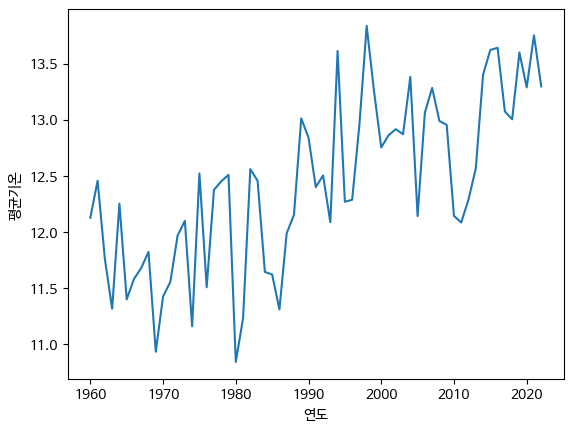

In [12]:
import matplotlib.pyplot as plt
# 연도별 평균기온 계산
yearly_mean_temperature = data.groupby('연도')['평균기온'].mean()

# 그래프 그리기
plt.rc('font', family='NanumBarunGothic')
plt.plot(yearly_mean_temperature.index, yearly_mean_temperature.values)
plt.xlabel('연도')
plt.ylabel('평균기온')
plt.show()

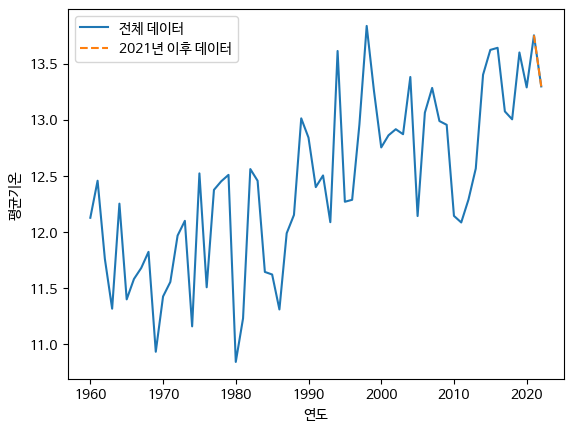

In [14]:
# 20년도 이후의 데이터 선택
data_after_2021 = data[data['연도'] >= 2021]

# 20년도 이후의 연도별 평균기온 계산
yearly_mean_temperature_after_2021 = data_after_2021.groupby('연도')['평균기온'].mean()

# 그래프 그리기
plt.rc('font', family='NanumBarunGothic')
plt.plot(yearly_mean_temperature.index, yearly_mean_temperature.values, label='전체 데이터')
plt.plot(yearly_mean_temperature_after_2021.index, yearly_mean_temperature_after_2021.values, label='2021년 이후 데이터', linestyle='--')
plt.xlabel('연도')
plt.ylabel('평균기온')
plt.legend()
plt.show()

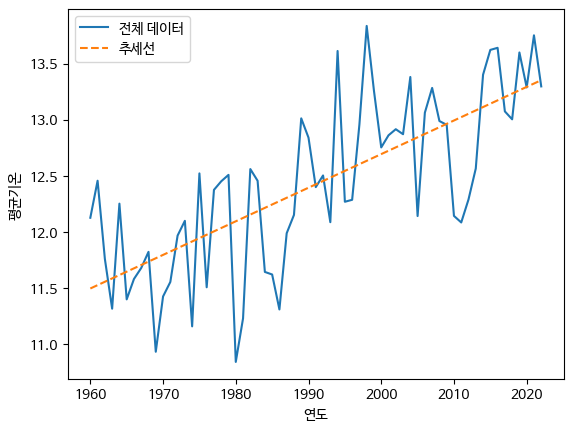

In [16]:
import numpy as np

# 전체 데이터에 대한 최적의 선형 추세선 계산
coefficients = np.polyfit(yearly_mean_temperature.index, yearly_mean_temperature.values, 1)
poly_line = np.poly1d(coefficients)

# 전체 데이터에 대한 그래프 그리기
plt.plot(yearly_mean_temperature.index, yearly_mean_temperature.values, label='전체 데이터')

# 최적의 선형 추세선 그리기
plt.rc('font', family='NanumBarunGothic')
plt.plot(yearly_mean_temperature.index, poly_line(yearly_mean_temperature.index), label='추세선', linestyle='--')
plt.xlabel('연도')
plt.ylabel('평균기온')
plt.legend()
plt.show()

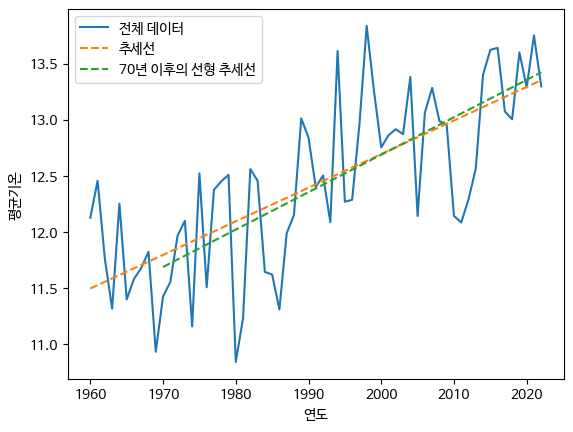

In [17]:
# 70년부터의 데이터 선택
data_after_1970 = data[data['연도'] >= 1970]

# 70년부터의 연도별 평균기온 계산
yearly_mean_temperature_after_1970 = data_after_1970.groupby('연도')['평균기온'].mean()

# 70년부터의 최적의 선형 추세선 계산
coefficients_after_1970 = np.polyfit(yearly_mean_temperature_after_1970.index, yearly_mean_temperature_after_1970.values, 1)
poly_line_after_1970 = np.poly1d(coefficients_after_1970)

# 전체 데이터에 대한 그래프 그리기
plt.plot(yearly_mean_temperature.index, yearly_mean_temperature.values, label='전체 데이터')

# 70년부터의 최적의 선형 추세선 그리기
plt.rc('font', family='NanumBarunGothic')
plt.plot(yearly_mean_temperature.index, poly_line(yearly_mean_temperature.index), label='추세선', linestyle='--')
plt.plot(yearly_mean_temperature_after_1970.index, poly_line_after_1970(yearly_mean_temperature_after_1970.index), label='70년 이후의 선형 추세선', linestyle='--')

plt.xlabel('연도')
plt.ylabel('평균기온')
plt.legend()
plt.show()

그래프를 보면 60년이전부터 70년까지 우하향응ㄹ 그리다 70년부터 다시 우상향하는 모습을 보면 추세의 시작을 70년대로 보고 70년 이전 데이터를 무시하고 다시 적용해볼만 한 것 같다

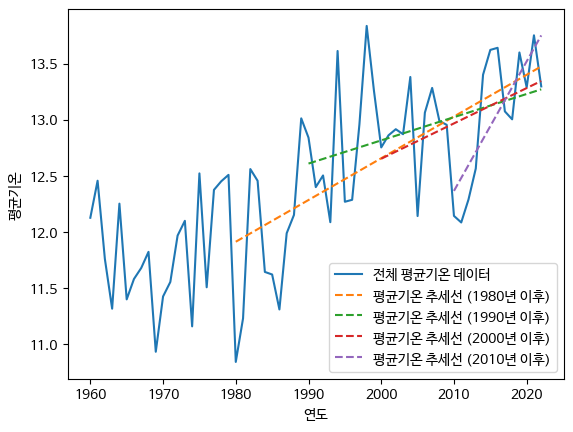

In [20]:
# 각 연도별로 데이터 선택
data_after_1980 = data[data['연도'] >= 1980]
data_after_1990 = data[data['연도'] >= 1990]
data_after_2000 = data[data['연도'] >= 2000]
data_after_2010 = data[data['연도'] >= 2010]

# 연도별 평균기온의 추세선 계산
coefficients_mean_temperature_1980 = np.polyfit(data_after_1980['연도'], data_after_1980['평균기온'], 1)
coefficients_mean_temperature_1990 = np.polyfit(data_after_1990['연도'], data_after_1990['평균기온'], 1)
coefficients_mean_temperature_2000 = np.polyfit(data_after_2000['연도'], data_after_2000['평균기온'], 1)
coefficients_mean_temperature_2010 = np.polyfit(data_after_2010['연도'], data_after_2010['평균기온'], 1)

# 추세선 함수 생성
poly_line_mean_temperature_1980 = np.poly1d(coefficients_mean_temperature_1980)
poly_line_mean_temperature_1990 = np.poly1d(coefficients_mean_temperature_1990)
poly_line_mean_temperature_2000 = np.poly1d(coefficients_mean_temperature_2000)
poly_line_mean_temperature_2010 = np.poly1d(coefficients_mean_temperature_2010)

# 전체 데이터에 대한 그래프 그리기
plt.plot(yearly_mean_temperature.index, yearly_mean_temperature.values, label='전체 평균기온 데이터')

# 각 연도별로 평균기온의 추세선 그리기
plt.plot(data_after_1980['연도'], poly_line_mean_temperature_1980(data_after_1980['연도']), label='평균기온 추세선 (1980년 이후)', linestyle='--')
plt.plot(data_after_1990['연도'], poly_line_mean_temperature_1990(data_after_1990['연도']), label='평균기온 추세선 (1990년 이후)', linestyle='--')
plt.plot(data_after_2000['연도'], poly_line_mean_temperature_2000(data_after_2000['연도']), label='평균기온 추세선 (2000년 이후)', linestyle='--')
plt.plot(data_after_2010['연도'], poly_line_mean_temperature_2010(data_after_2010['연도']), label='평균기온 추세선 (2010년 이후)', linestyle='--')

plt.xlabel('연도')
plt.ylabel('평균기온')
plt.legend()
plt.show()

2010년 이후 데이터가 크게 다른 추세를 보임

10년 단위의 추세로 적용해서 해볼 필요가 있다